In [95]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split

#### https://www.kaggle.com/ternaryrealm/lstm-time-series-explorations-with-keras

In [53]:
yahoo = pdr.get_data_yahoo("SPY", start="2017-01-01", end="2017-04-30")

In [56]:
yahoo.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,225.830002,223.880005,225.039993,225.240005,91366500.0,216.826019
2017-01-04,226.750000,225.610001,225.619995,226.580002,78744400.0,218.115921
2017-01-05,226.580002,225.479996,226.270004,226.399994,78379000.0,217.942657
2017-01-06,227.750000,225.899994,226.529999,227.210007,71559900.0,218.722412
2017-01-09,227.070007,226.419998,226.910004,226.460007,46265300.0,218.000443


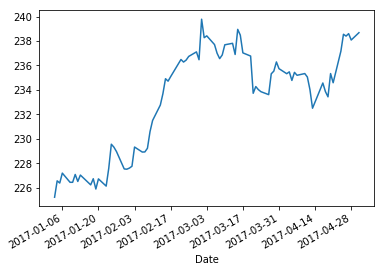

In [220]:
yahoo.Close.plot()

In [60]:
diff_series = yahoo.Close.diff()

In [135]:
yahoo.Close.head()

Date
2017-01-03    225.240005
2017-01-04    226.580002
2017-01-05    226.399994
2017-01-06    227.210007
2017-01-09    226.460007
Name: Close, dtype: float64

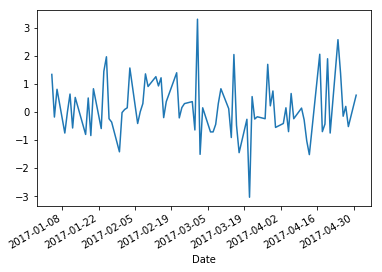

In [61]:
diff_series.plot()

In [67]:
X = diff_series.values[1:]

In [71]:
X = X.reshape(X.shape[0],1)

In [72]:
X[:10]

array([[ 1.33999634],
       [-0.18000793],
       [ 0.81001282],
       [-0.75      ],
       [ 0.        ],
       [ 0.63999939],
       [-0.57000732],
       [ 0.52000427],
       [-0.80000305],
       [ 0.5       ]])

In [221]:
scaler = MinMaxScaler(feature_range = (0, 1))

In [222]:
X_scale = scaler.fit_transform(X)

In [223]:
y_scale = X_scale.ravel()[1:]

In [224]:
last_X = X_scale[-1] ## saved for future, when will need to predict

In [225]:
X_scale = X_scale[:-1]

In [227]:
# now both X and y with length 80
print(len(X_scale), len(y_scale))

80 80


## Split into train and test

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y_scale, test_size=0.4, shuffle=False)

In [232]:
X_train.shape

(48, 1)

In [233]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])

In [234]:
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [235]:
X_train.shape

(48, 1, 1)

### Fit

In [209]:
model = Sequential()

In [210]:
model.add(LSTM(4, input_shape=(1,1))) # ultimo parametro é o window sizde, i.e numero de features p/ regressao multipla

In [211]:
# model.add(Dropout(0.2))

In [212]:
model.add(Dense(1))

In [213]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [214]:
model.fit(X_train, y_train, epochs=500, batch_size=4, verbose=1)

Epoch 1/500
48/48 [==============================] - 1s 24ms/step - loss: 0.0873
Epoch 2/500
48/48 [==============================] - 0s 688us/step - loss: 0.0867
Epoch 3/500
48/48 [==============================] - 0s 750us/step - loss: 0.0865
Epoch 4/500
48/48 [==============================] - 0s 687us/step - loss: 0.0861
Epoch 5/500
48/48 [==============================] - 0s 750us/step - loss: 0.0858
Epoch 6/500
48/48 [==============================] - 0s 833us/step - loss: 0.0856
Epoch 7/500
48/48 [==============================] - 0s 854us/step - loss: 0.0856
Epoch 8/500
48/48 [==============================] - 0s 771us/step - loss: 0.0853
Epoch 9/500
48/48 [==============================] - 0s 792us/step - loss: 0.0851
Epoch 10/500
48/48 [==============================] - 0s 687us/step - loss: 0.0850
Epoch 11/500
48/48 [==============================] - 0s 708us/step - loss: 0.0850
Epoch 12/500
48/48 [==============================] - 0s 708us/step - loss: 0.0848
Epoch 13/500
4

48/48 [==============================] - 0s 750us/step - loss: 0.0834
Epoch 101/500
48/48 [==============================] - 0s 854us/step - loss: 0.0834
Epoch 102/500
48/48 [==============================] - 0s 792us/step - loss: 0.0833
Epoch 103/500
48/48 [==============================] - 0s 1ms/step - loss: 0.0832
Epoch 104/500
48/48 [==============================] - 0s 958us/step - loss: 0.0833
Epoch 105/500
48/48 [==============================] - 0s 958us/step - loss: 0.0833
Epoch 106/500
48/48 [==============================] - 0s 979us/step - loss: 0.0832
Epoch 107/500
48/48 [==============================] - 0s 875us/step - loss: 0.0835
Epoch 108/500
48/48 [==============================] - 0s 1ms/step - loss: 0.0832
Epoch 109/500
48/48 [==============================] - 0s 1ms/step - loss: 0.0832
Epoch 110/500
48/48 [==============================] - 0s 917us/step - loss: 0.0832
Epoch 111/500
48/48 [==============================] - 0s 917us/step - loss: 0.0832
Epoch 112/50

48/48 [==============================] - 0s 667us/step - loss: 0.0829
Epoch 198/500
48/48 [==============================] - 0s 729us/step - loss: 0.0829
Epoch 199/500
48/48 [==============================] - 0s 688us/step - loss: 0.0828
Epoch 200/500
48/48 [==============================] - 0s 604us/step - loss: 0.0830
Epoch 201/500
48/48 [==============================] - 0s 687us/step - loss: 0.0830
Epoch 202/500
48/48 [==============================] - 0s 625us/step - loss: 0.0828
Epoch 203/500
48/48 [==============================] - 0s 604us/step - loss: 0.0828
Epoch 204/500
48/48 [==============================] - 0s 708us/step - loss: 0.0829
Epoch 205/500
48/48 [==============================] - 0s 688us/step - loss: 0.0829
Epoch 206/500
48/48 [==============================] - 0s 646us/step - loss: 0.0828
Epoch 207/500
48/48 [==============================] - 0s 688us/step - loss: 0.0830
Epoch 208/500
48/48 [==============================] - 0s 708us/step - loss: 0.0828
Epoch 

48/48 [==============================] - 0s 646us/step - loss: 0.0825
Epoch 295/500
48/48 [==============================] - 0s 625us/step - loss: 0.0825
Epoch 296/500
48/48 [==============================] - 0s 688us/step - loss: 0.0825
Epoch 297/500
48/48 [==============================] - 0s 750us/step - loss: 0.0825
Epoch 298/500
48/48 [==============================] - 0s 750us/step - loss: 0.0825
Epoch 299/500
48/48 [==============================] - 0s 771us/step - loss: 0.0825
Epoch 300/500
48/48 [==============================] - 0s 625us/step - loss: 0.0824
Epoch 301/500
48/48 [==============================] - 0s 708us/step - loss: 0.0824
Epoch 302/500
48/48 [==============================] - 0s 625us/step - loss: 0.0826
Epoch 303/500
48/48 [==============================] - 0s 771us/step - loss: 0.0826
Epoch 304/500
48/48 [==============================] - 0s 646us/step - loss: 0.0825
Epoch 305/500
48/48 [==============================] - 0s 646us/step - loss: 0.0824
Epoch 

48/48 [==============================] - 0s 646us/step - loss: 0.0822
Epoch 392/500
48/48 [==============================] - 0s 583us/step - loss: 0.0822
Epoch 393/500
48/48 [==============================] - 0s 604us/step - loss: 0.0823
Epoch 394/500
48/48 [==============================] - 0s 646us/step - loss: 0.0822
Epoch 395/500
48/48 [==============================] - 0s 583us/step - loss: 0.0822
Epoch 396/500
48/48 [==============================] - 0s 687us/step - loss: 0.0822
Epoch 397/500
48/48 [==============================] - 0s 583us/step - loss: 0.0823
Epoch 398/500
48/48 [==============================] - 0s 625us/step - loss: 0.0823
Epoch 399/500
48/48 [==============================] - 0s 646us/step - loss: 0.0822
Epoch 400/500
48/48 [==============================] - 0s 604us/step - loss: 0.0823
Epoch 401/500
48/48 [==============================] - 0s 708us/step - loss: 0.0823
Epoch 402/500
48/48 [==============================] - 0s 583us/step - loss: 0.0823
Epoch 

48/48 [==============================] - 0s 563us/step - loss: 0.0823
Epoch 489/500
48/48 [==============================] - 0s 646us/step - loss: 0.0824
Epoch 490/500
48/48 [==============================] - 0s 604us/step - loss: 0.0821
Epoch 491/500
48/48 [==============================] - 0s 625us/step - loss: 0.0821
Epoch 492/500
48/48 [==============================] - 0s 646us/step - loss: 0.0822
Epoch 493/500
48/48 [==============================] - 0s 833us/step - loss: 0.0821
Epoch 494/500
48/48 [==============================] - 0s 563us/step - loss: 0.0821
Epoch 495/500
48/48 [==============================] - 0s 708us/step - loss: 0.0821
Epoch 496/500
48/48 [==============================] - 0s 563us/step - loss: 0.0824
Epoch 497/500
48/48 [==============================] - 0s 604us/step - loss: 0.0821
Epoch 498/500
48/48 [==============================] - 0s 667us/step - loss: 0.0822
Epoch 499/500
48/48 [==============================] - 0s 667us/step - loss: 0.0823
Epoch 

### Predict and score

In [215]:
def predict_and_score(model, X, Y):
    # Make predictions on the original scale of the data.
    pred = scaler.inverse_transform(model.predict(X))
    # Prepare Y data to also be on the original scale for interpretability.
    orig_data = scaler.inverse_transform([Y])
    
    plt.figure(figsize=(15,5))
    plt.plot(pred.ravel(), label='prediction')
    plt.plot(orig_data.T, label='real')
    plt.legend()
    plt.show()
    
    # Calculate RMSE.
    score = np.sqrt(mean_squared_error(orig_data[0], pred[:, 0]))
    return(score, pred, orig_data.T)

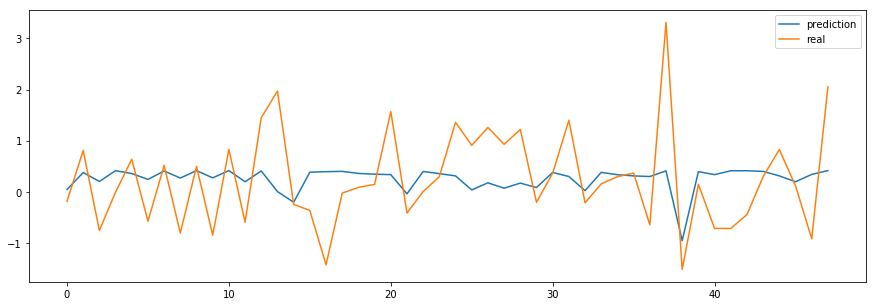

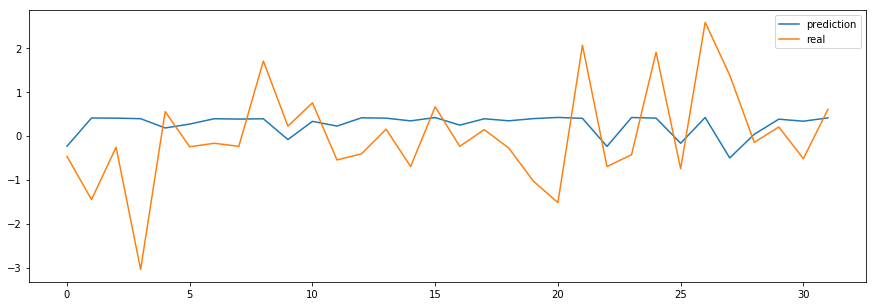

Training data score: 0.91 RMSE
Test data score: 1.16 RMSE


In [216]:
rmse_train, train_predict, train_real = predict_and_score(model, X_train, y_train)
rmse_test, test_predict, test_real = predict_and_score(model, X_test, y_test)

print("Training data score: %.2f RMSE" % rmse_train)
print("Test data score: %.2f RMSE" % rmse_test)

### Visualize

In [217]:
def compare_model(predict, real, init_value):
    df = pd.DataFrame({'Delta_pred' : predict.ravel(), 'Delta_real':  real.ravel()})
    df['Close_pred'] = df.Delta_pred.cumsum() + init_value
    df['Close_real'] = df.Delta_real.cumsum() + init_value
    df.drop(['Delta_pred', 'Delta_real'], axis=1, inplace=True)
    df.plot()
    return df

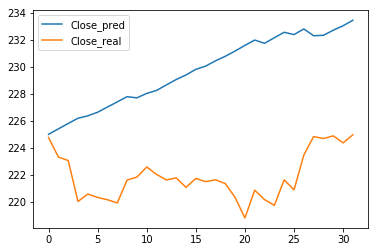

In [236]:
c1 = compare_model(test_predict, test_real, yahoo.Close[0])

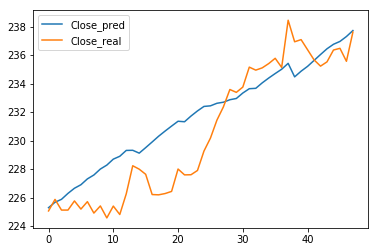

In [237]:
c2 = compare_model(train_predict, train_real, yahoo.Close[0])